In [29]:
%matplotlib inline
from semcable.experiment import Experiment
from util import get_corpus_text, make_doc_word_matrix

In [21]:
texts = get_corpus_text('Three Months for Semantic Network Experiments', 'MSNBCW')

In [39]:
#import cProfile
#cProfile.run('doc_word_mat, vocab = make_doc_word_matrix(texts[:10])')
doc_word_mat, vocab = make_doc_word_matrix(texts)

['game', 'play', 'good', 'steve', 'kornacki', 'chris', 'past', 'donald', 'trump', 'wrapped', 'campaign', 'billed', 'major', 'speech', 'topic', 'year', 'denigrating', 'mexican', 'government', 'talking', 'tough', 'illegal', 'immigration', 'weeks', 'raising', 'questions', 'shifting', 'rhetoric', 'tonight', 'laid']
(1437, 58902)


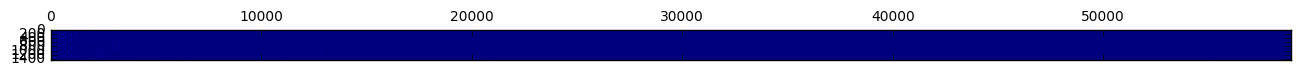

In [33]:
print(vocab[:30])
print(doc_word_mat.shape)
plt.matshow(doc_word_mat)

In [37]:
empties = np.where(doc_word_mat.sum(axis=1) == 0)
print(empties)
doc_word_mat.dtype

(array([], dtype=int64),)


dtype('float64')

In [ ]:
e = Experiment(doc_word_mat, vocab)

e.fit_lda(n_topics=80)
e.calculate_adjacency()
e.make_graph()
e.fit_powerlaw()
print(e.power_law_coefficients)


INFO:lda:n_documents: 1437
INFO:lda:vocab_size: 58902
INFO:lda:n_words: 3982223
INFO:lda:n_topics: 80
INFO:lda:n_iter: 2000
INFO:lda:<0> log likelihood: -51030430
INFO:lda:<10> log likelihood: -42876390
INFO:lda:<20> log likelihood: -39768935
INFO:lda:<30> log likelihood: -38714661
INFO:lda:<40> log likelihood: -38162380
INFO:lda:<50> log likelihood: -37821923
INFO:lda:<60> log likelihood: -37571461
INFO:lda:<70> log likelihood: -37384558
INFO:lda:<80> log likelihood: -37237311
INFO:lda:<90> log likelihood: -37123604
INFO:lda:<100> log likelihood: -37010894
INFO:lda:<110> log likelihood: -36924837
INFO:lda:<120> log likelihood: -36843349
INFO:lda:<130> log likelihood: -36755522
INFO:lda:<140> log likelihood: -36672913
INFO:lda:<150> log likelihood: -36603868
INFO:lda:<160> log likelihood: -36543464
INFO:lda:<170> log likelihood: -36472923
INFO:lda:<180> log likelihood: -36418143
INFO:lda:<190> log likelihood: -36359243
INFO:lda:<200> log likelihood: -36314506
INFO:lda:<210> log likelih

In [1]:
doc_word_mat[:5]

NameError: name 'doc_word_mat' is not defined